<a href="https://colab.research.google.com/github/Zjmgpk/CS5530/blob/main/Assignment1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assignment1_2/StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


V1:

In [4]:
df1 = df.drop(['race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'writing score'], axis=1)
df1

,gender,math score,reading score
0,female,72,72
1,female,69,90
2,female,90,95
3,male,47,57
4,male,76,78
...,...,...,...
995,female,88,99
996,male,62,55
997,female,59,71
998,female,68,78


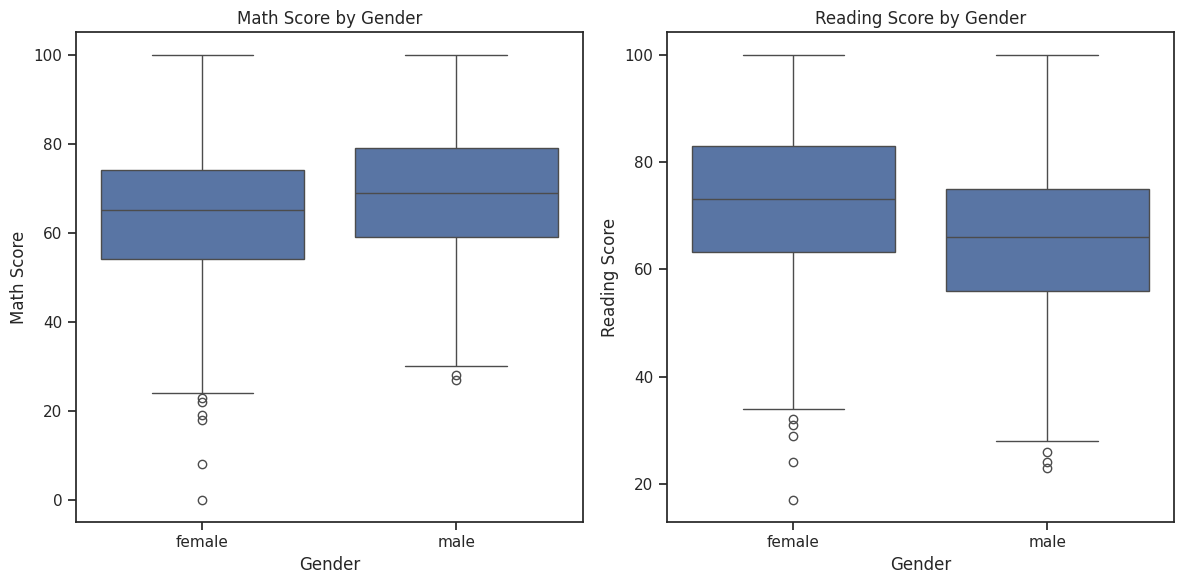

In [5]:
fig, axes = plt.subplots(1,2, figsize=(12,6))

sns.boxplot(x='gender', y='math score', data=df1, ax=axes[0])
axes[0].set_title('Math Score by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Math Score')

sns.boxplot(x='gender', y='reading score', data=df1, ax=axes[1])
axes[1].set_title('Reading Score by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Reading Score')

plt.tight_layout()
plt.show()

V2:

In [6]:
df2 = df.drop(['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'reading score', 'writing score'], axis=1)
df2

,test preparation course,math score
0,none,72
1,completed,69
2,none,90
3,none,47
4,none,76
...,...,...
995,completed,88
996,none,62
997,completed,59
998,completed,68


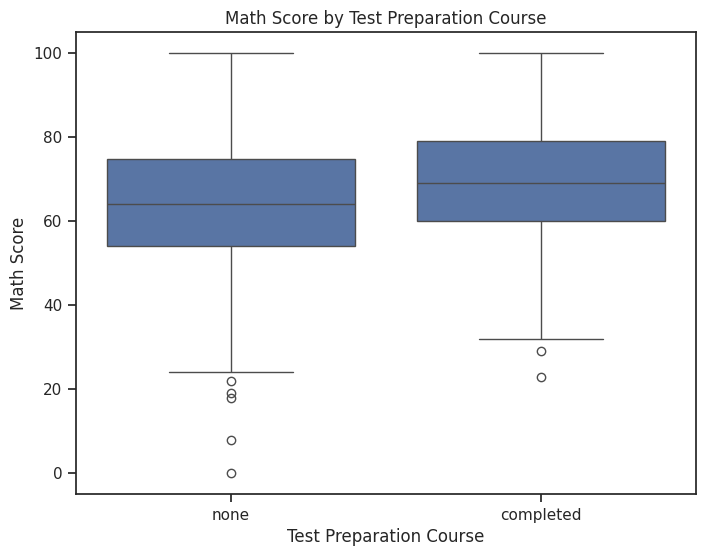

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='test preparation course', y='math score', data=df2)
plt.title('Math Score by Test Preparation Course')
plt.xlabel('Test Preparation Course')
plt.ylabel('Math Score')
plt.show()

V3:

In [8]:
df3= df.drop(['gender', 'race/ethnicity', 'parental level of education', 'test preparation course'], axis=1)
df3

,lunch,math score,reading score,writing score
0,standard,72,72,74
1,standard,69,90,88
2,standard,90,95,93
3,free/reduced,47,57,44
4,standard,76,78,75
...,...,...,...,...
995,standard,88,99,95
996,free/reduced,62,55,55
997,free/reduced,59,71,65
998,standard,68,78,77


In [9]:
df3["overall_avg"] = (df["math score"]+df["reading score"]+df["writing score"])/3
df3

,lunch,math score,reading score,writing score,overall_avg
0,standard,72,72,74,72.666667
1,standard,69,90,88,82.333333
2,standard,90,95,93,92.666667
3,free/reduced,47,57,44,49.333333
4,standard,76,78,75,76.333333
...,...,...,...,...,...
995,standard,88,99,95,94.000000
996,free/reduced,62,55,55,57.333333
997,free/reduced,59,71,65,65.000000
998,standard,68,78,77,74.333333


In [10]:
df3['overall_avg'] = df3["overall_avg"].round(2)
display(df3)

,lunch,math score,reading score,writing score,overall_avg
0,standard,72,72,74,72.67
1,standard,69,90,88,82.33
2,standard,90,95,93,92.67
3,free/reduced,47,57,44,49.33
4,standard,76,78,75,76.33
...,...,...,...,...,...
995,standard,88,99,95,94.00
996,free/reduced,62,55,55,57.33
997,free/reduced,59,71,65,65.00
998,standard,68,78,77,74.33


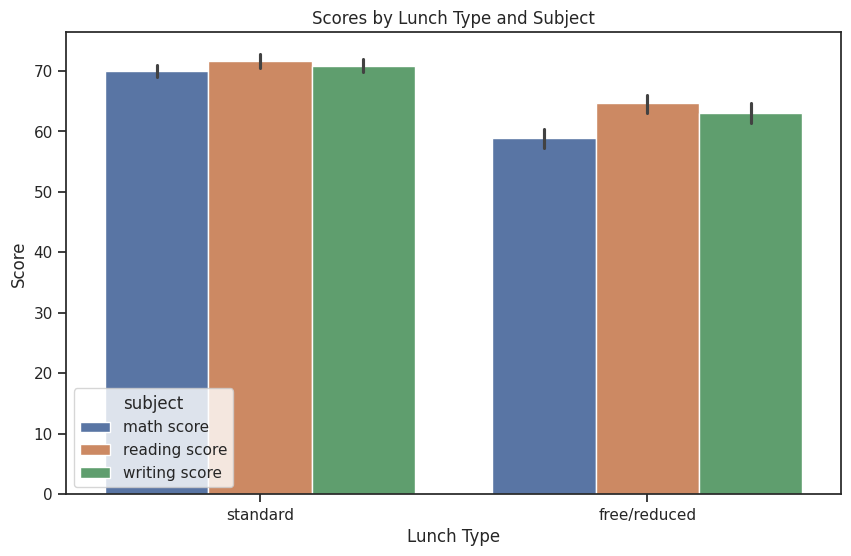

In [11]:
df3_melted = df3.melt(id_vars=['lunch'], value_vars=['math score', 'reading score', 'writing score'], var_name='subject', value_name='score')

plt.figure(figsize=(10, 6))
sns.barplot(x='lunch', y='score', hue='subject', data=df3_melted)
plt.title('Scores by Lunch Type and Subject')
plt.xlabel('Lunch Type')
plt.ylabel('Score')
plt.show()

V4:

In [12]:
df4=df.drop(['gender','race/ethnicity', 'parental level of education', 'lunch','test preparation course'], axis=1)
df4

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


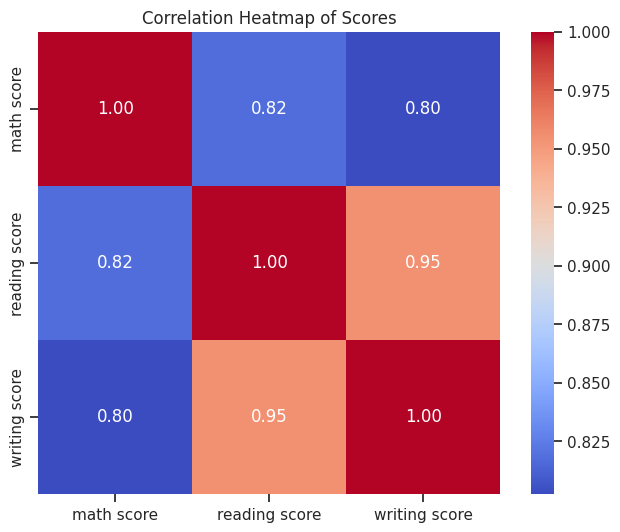

In [23]:
correlation_matrix = df4.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square = True ,fmt=".2f")
plt.title('Correlation Heatmap of Scores')
plt.show()

V5

In [14]:
df5=df.drop(['gender','race/ethnicity', 'parental level of education', 'lunch','writing score'], axis=1)
df5

,test preparation course,math score,reading score
0,none,72,72
1,completed,69,90
2,none,90,95
3,none,47,57
4,none,76,78
...,...,...,...
995,completed,88,99
996,none,62,55
997,completed,59,71
998,completed,68,78


<Figure size 1000x600 with 0 Axes>

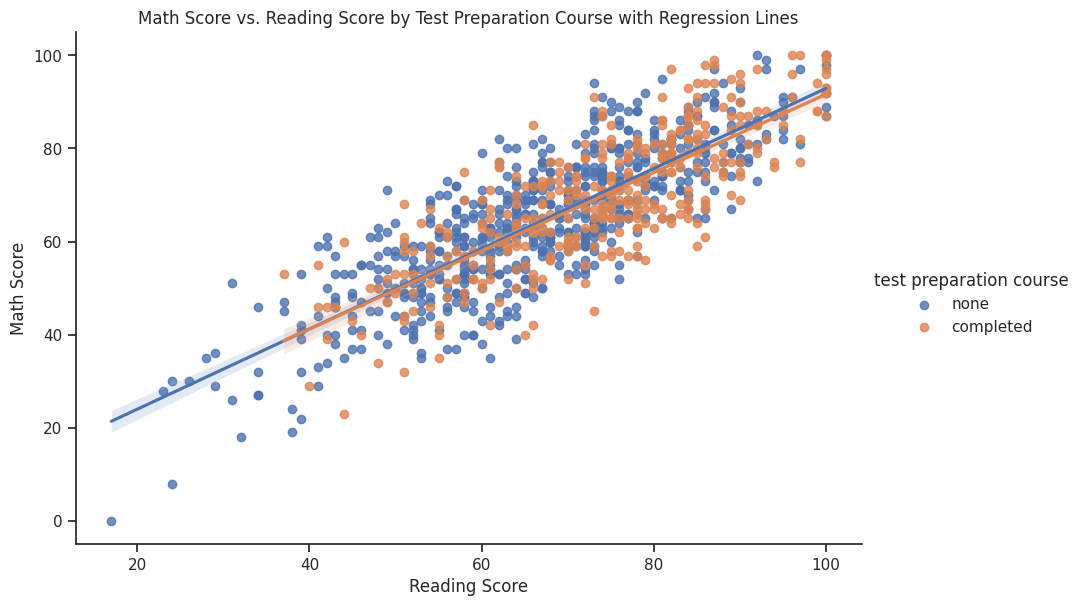

In [24]:
plt.figure(figsize=(10, 6))
sns.lmplot(x='reading score', y='math score', hue='test preparation course', data=df5, height=6, aspect=1.5)
plt.title('Math Score vs. Reading Score by Test Preparation Course with Regression Lines')
plt.xlabel('Reading Score')
plt.ylabel('Math Score')
plt.show()